# Primera evaluación - Aprendizaje Automático
## Juan José Hoyos Urcué
### Punto 1 - Conocer el conjunto de datos y realizar un plan para ajustar los datos


In [1]:

# Aquí se cargan las librerías y se hace la lectura del archivo que contiene la base de datos sick-euthyroid
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/sick-euthyroid.data"
data = pd.read_csv(url, header=None, na_values="?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original sick-euthyroid que está en el 
#repositorio junto con el archivo de datos)

data.columns = ['sick_euthyroid','Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
              'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH',
               'T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']
data



,sick_euthyroid,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,72.0,M,f,f,f,f,f,f,f,...,y,1.0,y,83.0,y,0.95,y,87.0,n,NaN
1,sick-euthyroid,45.0,F,f,f,f,f,f,f,f,...,y,1.0,y,82.0,y,0.73,y,112.0,n,NaN
2,sick-euthyroid,64.0,F,f,f,f,f,f,f,f,...,y,1.0,y,101.0,y,0.82,y,123.0,n,NaN
3,sick-euthyroid,56.0,M,f,f,f,f,f,f,f,...,y,0.8,y,76.0,y,0.77,y,99.0,n,NaN
4,sick-euthyroid,78.0,F,t,f,f,f,t,f,f,...,y,0.3,y,87.0,y,0.95,y,91.0,n,NaN
5,sick-euthyroid,80.0,M,f,f,f,f,f,f,f,...,y,0.8,y,105.0,y,0.88,y,120.0,n,NaN
6,sick-euthyroid,74.0,F,f,f,f,f,f,f,f,...,y,0.7,y,98.0,y,0.81,y,121.0,n,NaN
7,sick-euthyroid,NaN,F,f,f,f,f,f,f,f,...,y,1.1,y,121.0,y,1.11,y,109.0,n,NaN
8,sick-euthyroid,42.0,F,f,f,f,f,f,f,f,...,y,1.1,y,93.0,y,0.73,y,127.0,n,NaN
9,sick-euthyroid,89.0,M,f,f,f,f,f,f,f,...,y,0.8,y,111.0,y,0.68,y,165.0,n,NaN


In [2]:
#En el primer elemento de la tupla podemos apreciar la cantidad de registros que tiene la base de datos
#En el segundo elemento de la tupla podemos apreciar la cantidad de atributos que tiene la base de datos
shape = data.shape
shape


(3163, 26)

In [3]:
#Aquí podemos apreciar el tipo de cada uno de los atributos
data. dtypes

sick_euthyroid                object
Age                          float64
Sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [4]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [5]:
#sacamos la moda de los atributos
data.mode()

,sick_euthyroid,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,negative,59.0,F,f,f,f,f,f,f,f,...,y,1.6,y,98.0,y,0.98,y,98.0,n,28.0
1,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.8,NaN,NaN,NaN,NaN,NaN,107.0,NaN,NaN


In [6]:
#Aquí podemos apreciar la matriz de correlación
data.corr()

,Age,TSH,T3,TT4,T4U,FTI,TBG
Age,1.000000,-0.009155,-0.332307,-0.103116,-0.226361,0.027389,-0.174584
TSH,-0.009155,1.000000,-0.187229,-0.321945,0.071171,-0.265294,-0.352416
T3,-0.332307,-0.187229,1.000000,0.602734,0.410819,0.328370,0.951505
TT4,-0.103116,-0.321945,0.602734,1.000000,0.322862,0.684969,0.569442
T4U,-0.226361,0.071171,0.410819,0.322862,1.000000,-0.283284,0.963883
FTI,0.027389,-0.265294,0.328370,0.684969,-0.283284,1.000000,0.028285
TBG,-0.174584,-0.352416,0.951505,0.569442,0.963883,0.028285,1.000000


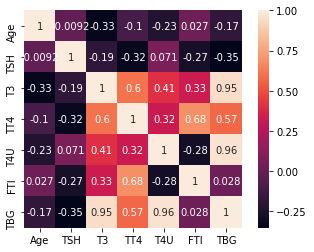

In [7]:
#Aquí podemos apreciar la matriz de correlación de una manera más gráfica
sns.heatmap(data.corr(), square=True, annot=True)

In [8]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

7

In [9]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

sick_euthyroid                  0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

### ¿En qué atributos hay datos atípicos?
#### Es importante resaltar que al momento de intentar realizar los diagramas de cajas y bigotes se obtuvieron graficas vacias
#### por la presencia de datos faltantes en los atributos numéricos, por lo que se decide no incluirlas en esta etapa
#### si no el la de preprocesamiento, para reemplazar los datos faltantes y poder generar estos diagramas


In [10]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
print(data['sick_euthyroid'].value_counts())

negative          2870
sick-euthyroid     293
Name: sick_euthyroid, dtype: int64


# Análisis de los Resultados

-   El conjunto de datos es viable?
    >>Pienso que el conjunto de datos es  viable, pues tiene buena cantidad de información que aunque un poco turbia se puede aprovechar para poder construir modelos de aprendizaje bastante buenos
    
-   Cuáles son las dificultades más significativas que tiene el conjunto de datos?
    >>A pesar de considerarse un conjunto de datos viable presenta un desbalance que debe ser corregido para su  posterior procesamiento, además 
    la presencia de tantos datos faltantes presenta dificultades a la hora de realizar gráficos y también en el momento en que se quieran convertir los datos categŕoricos en numéricos
-   Es necesario eliminar atributos?
    >>Si,el atributo TBG presenta 2903 datos faltantes de 3163, lo cual es desproporcionado, pues faltan cerca del 92% de los datos.Este atributo está directamente relacionado con el atributo TBG_measured, por lo cual también es necesario eliminarlo
    
-   Es necesario eliminar registros?
    >>No, pues los atributos están presentes en la mayoría de los registros(máximo faltan 7 de 26), y los que hacen falta no son tan significantes en tamaño 
    respecto al tamaño del conjunto de datos, además contamos con muy pocos registros, por lo que debemos tratar de aprovecharlos todos  al máximo
    
-   Se van a reemplazar los valores nulos por algún valor?

    >>si, los datos faltantes se van a reemplazar por la moda
    
-   Cómo se van a manejar los datos atípicos?

    >>Como no se pudieron generar los diagramas de cajas y bigotes por la cantidad de Nan que tenemos, los datos atípicos se analizarán una vez se hayan reemplazado los datos faltantes por la moda
    
-   Es necesario normalizar los valores de los atributos?

    >>Si, se van a normalizar los atributos que presenten datos mayores a uno debido a la cantidad de atributos que van a quedar con cero y uno, pues no queremos que la información tenga de pronto ruido por estos números grandes en comparación con los booleanos (0 y 1)
    
-   Están los datos desbalanceados?
    >>Si, los datos presentan un desbalance evidente que debe resolverse posteriormente para que el aprendizaje sea el deseado y no se distorsione la información
   
    
   - Plan 
       * Eliminar las columnas TBG Y TBG_measured
       * Reemplazar los datos faltantes por la moda
       * Generar los diagramas de cajas y bigotes de los atributos numéricos
       * Convertir los datos categóricos a numéricos
       * Normalizar los atributos numéricos
       * Buscar una vez todos los datos en representación numérica correlación entre los atributos y eliminar aquellos que tengan coeficiente de correlación muy alta (porque se presenta redundancia)
       * Balancear los datos
       

## 2 Preprocesar el conjunto de datos (aplicar el plan establecido)

In [11]:
#Eliminar las columnas TBG Y TBG_measured
del data['TBG_measured']
del data['TBG']
data
shape = data.shape
shape

(3163, 24)

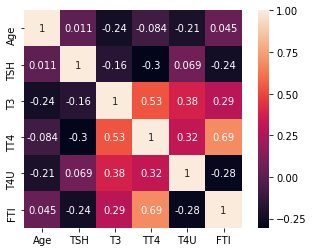

In [12]:
#Reemplazar los datos faltantes por la moda
data.Age.fillna(data.Age.mode()[0], inplace=True)
data.Sex.fillna(data.Sex.mode()[0], inplace=True)
data.TSH.fillna(data.TSH.mode()[0], inplace=True)
data.T3.fillna(data.T3.mode()[0], inplace=True)
data.TT4.fillna(data.TT4.mode()[0], inplace=True)
data.T4U.fillna(data.T4U.mode()[0], inplace=True)
data.FTI.fillna(data.FTI.mode()[0], inplace=True)
data
data.isnull().sum()
sns.heatmap(data.corr(), square=True, annot=True)

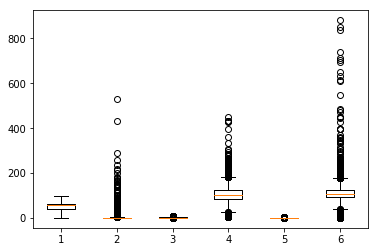

In [13]:
#Generar los diagramas de cajas y bigotes
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['Age'],data['TSH'],data['T3'],data['TT4'],data['T4U'], data['FTI']))
plt.show()

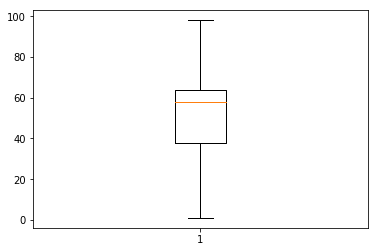

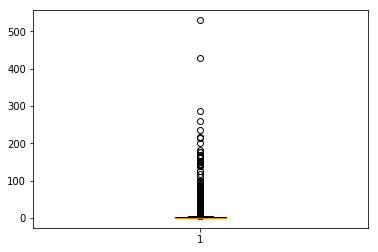

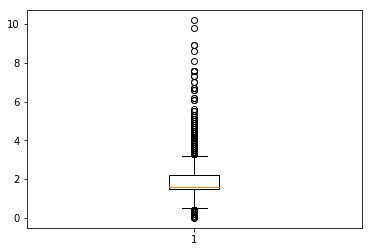

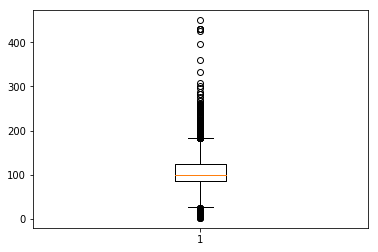

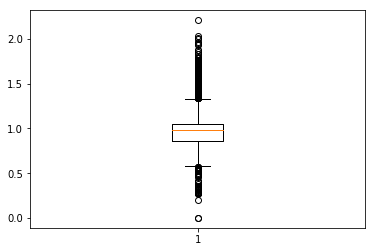

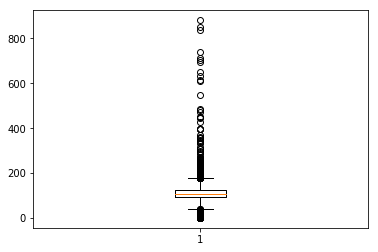

In [14]:
#En qué atributos hay datos atípicos?
plt.boxplot(data['Age'])
plt.show()
plt.boxplot(data['TSH'])
plt.show()
plt.boxplot(data['T3'])
plt.show()
plt.boxplot(data['TT4'])
plt.show()
plt.boxplot(data['T4U'])
plt.show()
plt.boxplot(data['FTI'])
plt.show()

### Decisión sobre los datos atípicos
- Yo asumo que los valores atípicos no se deben a un error a la hora de construir la base de datos si no por la naturaleza de los datos en cuestión, por lo tanto considero que  eliminarlos no es la solución, pues se pueden modificar las inferencias que se realicen a partir de esa información, debido a que se introduce un sesgo.Así que por el momento decido dejarlos y ver qué tan bueno es el modelo que se logre construir

In [15]:
#Convertir los datos categóricos a numéricos
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
data['sick_euthyroid'] = labelencoder.fit_transform(data['sick_euthyroid'])
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['on_thyroxine'] = labelencoder.fit_transform(data['on_thyroxine'])
data['query_on_thyroxine'] = labelencoder.fit_transform(data['query_on_thyroxine'])
data['on_antithyroid_medication'] = labelencoder.fit_transform(data['on_antithyroid_medication'])
data['thyroid_surgery'] = labelencoder.fit_transform(data['thyroid_surgery'])
data['query_hypothyroid'] = labelencoder.fit_transform(data['query_hypothyroid'])
data['query_hyperthyroid'] = labelencoder.fit_transform(data['query_hyperthyroid'])
data['pregnant'] = labelencoder.fit_transform(data['pregnant'])
data['sick'] = labelencoder.fit_transform(data['sick'])
data['tumor'] = labelencoder.fit_transform(data['tumor'])
data['lithium'] = labelencoder.fit_transform(data['lithium'])
data['goitre'] = labelencoder.fit_transform(data['goitre'])
data['TSH_measured'] = labelencoder.fit_transform(data['TSH_measured'])
data['T3_measured'] = labelencoder.fit_transform(data['T3_measured'])
data['TT4_measured'] = labelencoder.fit_transform(data['TT4_measured'])
data['T4U_measured'] = labelencoder.fit_transform(data['T4U_measured'])
data['FTI_measured'] = labelencoder.fit_transform(data['FTI_measured'])
data



,sick_euthyroid,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,72.0,1,0,0,0,0,0,0,0,...,0,0.00,1,1.0,1,83.0,1,0.95,1,87.0
1,1,45.0,0,0,0,0,0,0,0,0,...,1,1.90,1,1.0,1,82.0,1,0.73,1,112.0
2,1,64.0,0,0,0,0,0,0,0,0,...,1,0.09,1,1.0,1,101.0,1,0.82,1,123.0
3,1,56.0,1,0,0,0,0,0,0,0,...,1,0.00,1,0.8,1,76.0,1,0.77,1,99.0
4,1,78.0,0,1,0,0,0,1,0,0,...,1,2.60,1,0.3,1,87.0,1,0.95,1,91.0
5,1,80.0,1,0,0,0,0,0,0,0,...,1,1.40,1,0.8,1,105.0,1,0.88,1,120.0
6,1,74.0,0,0,0,0,0,0,0,0,...,1,0.00,1,0.7,1,98.0,1,0.81,1,121.0
7,1,59.0,0,0,0,0,0,0,0,0,...,1,1.40,1,1.1,1,121.0,1,1.11,1,109.0
8,1,42.0,0,0,0,0,0,0,0,0,...,1,2.30,1,1.1,1,93.0,1,0.73,1,127.0
9,1,89.0,1,0,0,0,0,0,0,0,...,1,0.80,1,0.8,1,111.0,1,0.68,1,165.0


In [16]:
data.describe()

,sick_euthyroid,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,...,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.092634,52.260512,0.287069,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,...,0.852039,5.046782,0.780272,1.865096,0.921277,107.995858,0.921593,0.978340,0.921910,114.039172
std,0.289964,18.089308,0.452466,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,...,0.355117,22.160083,0.414128,0.891612,0.269348,43.755469,0.268853,0.217513,0.268356,58.027055
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000
50%,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.400000,1.000000,1.600000,1.000000,100.000000,1.000000,0.980000,1.000000,105.000000
75%,0.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.800000,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000


In [17]:
#Normalizar atributos nunméricos
from sklearn import preprocessing
data['Age'] = preprocessing.scale(data['Age'])
data['TSH'] = preprocessing.scale(data['TSH'])
data['T3'] = preprocessing.scale(data['T3'])
data['TT4'] = preprocessing.scale(data['TT4'])
data['T4U'] = preprocessing.scale(data['T4U'])
data['FTI'] = preprocessing.scale(data['FTI'])
data

,sick_euthyroid,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,1.091397,1,0,0,0,0,0,0,0,...,0,-0.227778,1,-0.970414,1,-0.571353,1,-0.130312,1,-0.466049
1,1,-0.401434,0,0,0,0,0,0,0,0,...,1,-0.142025,1,-0.970414,1,-0.594211,1,-1.141905,1,-0.035147
2,1,0.649076,0,0,0,0,0,0,0,0,...,1,-0.223716,1,-0.970414,1,-0.159911,1,-0.728072,1,0.154449
3,1,0.206756,1,0,0,0,0,0,0,0,...,1,-0.227778,1,-1.194763,1,-0.731358,1,-0.957979,1,-0.259216
4,1,1.423137,0,1,0,0,0,1,0,0,...,1,-0.110431,1,-1.755633,1,-0.479921,1,-0.130312,1,-0.397105
5,1,1.533717,1,0,0,0,0,0,0,0,...,1,-0.164591,1,-1.194763,1,-0.068479,1,-0.452183,1,0.102741
6,1,1.201977,0,0,0,0,0,0,0,0,...,1,-0.227778,1,-1.306937,1,-0.228484,1,-0.774053,1,0.119977
7,1,0.372626,0,0,0,0,0,0,0,0,...,1,-0.164591,1,-0.858240,1,0.297247,1,0.605391,1,-0.086855
8,1,-0.567304,0,0,0,0,0,0,0,0,...,1,-0.123971,1,-0.858240,1,-0.342774,1,-1.141905,1,0.223394
9,1,2.031327,1,0,0,0,0,0,0,0,...,1,-0.191671,1,-1.194763,1,0.068668,1,-1.371812,1,0.878364


In [18]:
#Ahora como todos los datos son numéricos quiero averiguar su correlación y eliminar 
#los atributos que guarden un coeficiente de correlacion mayor a 0.90
print(data.corr())
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    print("borre "+colname)

    return dataset
data = correlation(data,0.90)
data

                           sick_euthyroid       Age       Sex  on_thyroxine  \
sick_euthyroid                   1.000000  0.194488  0.057584     -0.085620   
Age                              0.194488  1.000000  0.005466     -0.015857   
Sex                              0.057584  0.005466  1.000000     -0.121486   
on_thyroxine                    -0.085620 -0.015857 -0.121486      1.000000   
query_on_thyroxine              -0.009134 -0.018231  0.054593     -0.013820   
on_antithyroid_medication       -0.027539 -0.058175 -0.018664     -0.024433   
thyroid_surgery                 -0.009992 -0.012654 -0.038623      0.029355   
query_hypothyroid               -0.025997  0.044158 -0.063703      0.070498   
query_hyperthyroid              -0.055320 -0.094735 -0.057096     -0.088877   
pregnant                        -0.045549 -0.162321 -0.090461     -0.001168   
sick                             0.193075  0.061559  0.022396     -0.063956   
tumor                           -0.006883 -0.065612 

,sick_euthyroid,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U,FTI
0,1,1.091397,1,0,0,0,0,0,0,0,...,0,0,0,-0.227778,1,-0.970414,1,-0.571353,-0.130312,-0.466049
1,1,-0.401434,0,0,0,0,0,0,0,0,...,0,0,1,-0.142025,1,-0.970414,1,-0.594211,-1.141905,-0.035147
2,1,0.649076,0,0,0,0,0,0,0,0,...,0,0,1,-0.223716,1,-0.970414,1,-0.159911,-0.728072,0.154449
3,1,0.206756,1,0,0,0,0,0,0,0,...,0,0,1,-0.227778,1,-1.194763,1,-0.731358,-0.957979,-0.259216
4,1,1.423137,0,1,0,0,0,1,0,0,...,0,0,1,-0.110431,1,-1.755633,1,-0.479921,-0.130312,-0.397105
5,1,1.533717,1,0,0,0,0,0,0,0,...,0,0,1,-0.164591,1,-1.194763,1,-0.068479,-0.452183,0.102741
6,1,1.201977,0,0,0,0,0,0,0,0,...,0,0,1,-0.227778,1,-1.306937,1,-0.228484,-0.774053,0.119977
7,1,0.372626,0,0,0,0,0,0,0,0,...,0,0,1,-0.164591,1,-0.858240,1,0.297247,0.605391,-0.086855
8,1,-0.567304,0,0,0,0,0,0,0,0,...,0,0,1,-0.123971,1,-0.858240,1,-0.342774,-1.141905,0.223394
9,1,2.031327,1,0,0,0,0,0,0,0,...,0,0,1,-0.191671,1,-1.194763,1,0.068668,-1.371812,0.878364


In [19]:
# Preparación de conjunto alterno con balanceo entre clases 60-40
g = data.groupby('sick_euthyroid')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

sick_euthyroid       Age  Sex  on_thyroxine  \
sick_euthyroid                                                    
0              0                 0 -0.124984    0             1   
               1                 0 -1.507234    1             0   
               2                 0 -0.069694    1             0   
               3                 0  0.372626    1             0   
               4                 0  0.372626    0             0   
               5                 0  0.704366    0             0   
               6                 0  0.980817    1             0   
               7                 0  1.146687    0             1   
               8                 0 -0.346144    1             0   
               9                 0 -1.673104    0             1   
               10                0  0.870237    0             0   
               11                0  0.372626    0             0   
               12                0  0.925527    0             0   
               13                0 -1.396654    0             0   
               14                0  0.262046    0             0   
               15                0 -0.346144    0             0   
               16                0 -0.512014    1             0   
               17                0 -0.567304    0             0   
               18                0 -0.401434    1             0   
               19                0 -1.562524    0             0   
               20                0 -1.230784    0             1   
               21                0 -0.401434    0             0   
               22                0 -1.009624    0             0   
               23                0 -0.456724    0             0   
               24                0  0.427916    0             1   
               25                0  0.372626    1             0   
               26                0  0.538496    1             0   
               27                0  1.091397    0             0   
               28                0  0.814947    1             0   
               29                0 -1.562524    1             0   
...                            ...       ...  ...           ...   
1              263               1  1.423137    0             0   
               264               1  2.031327    1             0   
               265               1  0.372626    0             0   
               266               1  0.372626    0             0   
               267               1  0.372626    0             0   
               268               1  1.533717    1             0   
               269               1  1.423137    0             1   
               270               1  1.920747    1             0   
               271               1  1.312557    0             0   
               272               1  0.372626    0             0   
               273               1  1.091397    1             0   
               274               1 -0.124984    1             0   
               275               1 -0.567304    0             0   
               276               1  0.814947    1             0   
               277               1  0.206756    1             0   
               278               1  0.372626    0             0   
               279               1  0.262046    0             0   
               280               1 -0.843754    1             0   
               281               1  0.649076    1             0   
               282               1  0.980817    0             0   
               283               1  1.036107    0             0   
               284               1  0.649076    0             0   
               285               1  0.538496    1             0   
               286               1 -0.180274    0             0   
               287               1  1.754877    0             0   
               288               1  0.759656    0             0   
               289               1  0.151466    0             0   


In [20]:
print(dataBal['sick_euthyroid'].value_counts())

1    293
0    293
Name: sick_euthyroid, dtype: int64


## 3 Separar el conjunto de datos en conjunto de entrenamiento y de prueba

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from string import ascii_uppercase
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



y = dataBal.sick_euthyroid
X_train, X_test, y_train, y_test = train_test_split(dataBal, y, test_size=0.40)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
X_train = X_train.drop('sick_euthyroid', 1)
X_test = X_test.drop('sick_euthyroid', 1)
#del X_train['sick_euthyroid']
#del X_test['sick_euthyroid']
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(351, 22) (351,)
(235, 22) (235,)
(351, 21) (351,)
(235, 21) (235,)


## 4 Construcción de los modelos

In [22]:
#Clasificador por regresión lineal
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
lineal = regressor.predict(X_test)

In [23]:
#Clasificador por regresión logística
logisticRegr = LogisticRegression(solver="lbfgs", max_iter=700, tol=0.001)
logisticRegr.fit(X_train, y_train)
predictions_logistic = logisticRegr.predict(X_test)

In [24]:
#Clasificador K-vecinos más cercanos (k=5)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
kv_pred = classifier.predict(X_test)


In [25]:
#Clasificador Análisis discriminante lineal
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf_ans = clf.predict(X_test)

In [26]:
#Clasificador Análisis discriminante cuadrático
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
pred2 = qda.predict(X_test)
pred2

/home/juan2203/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

## 5 Matrices de confusión

0.5180921791999746


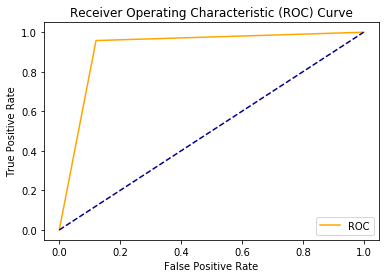

[[102  14]
 [  5 114]]


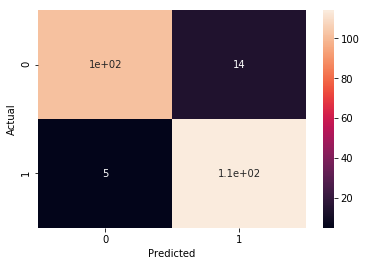

In [27]:
#Clasificador por regresión lineal
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#Se usa la curva ROC para poder mapear a uno o a cero cada uno de los valores
#que calcuó la regresión lineal usando el umbral (optimal_threshold)
fpr, tpr, thresholds = roc_curve(y_test, lineal)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

#plot_roc_curve(fpr, tpr)
lineal = list(lineal)
ans = [0 for _ in range(len(lineal))]
for i in range(len(lineal)):
    if lineal[i]<=optimal_threshold:
        ans[i] = 0
    else:
        ans[i] = 1
        
fpr, tpr, thresholds = roc_curve(y_test, ans)
plot_roc_curve(fpr, tpr)
#print(ans)

#Matriz de confusion
cm0 = confusion_matrix(y_test, ans)
print(cm0)
data_ln = {'y_Actual':    y_test,
        'y_Predicted': ans
        }
df = pd.DataFrame(data_ln, columns=['y_Actual','y_Predicted'])
confusion_matrix_l = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_l, annot=True)

[[108   8]
 [  7 112]]


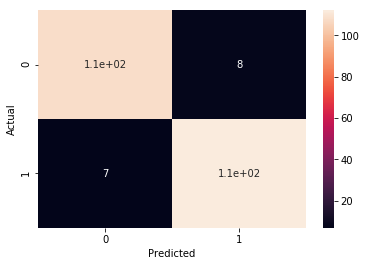

In [28]:
#Clasificador por regresión logística
cm1 = confusion_matrix(y_test, predictions_logistic)
print(cm1)
data_lg = {'y_Actual':    y_test,
        'y_Predicted': predictions_logistic
        }
df = pd.DataFrame(data_lg, columns=['y_Actual','y_Predicted'])
confusion_matrix_lg= pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_lg, annot=True)

[[106  10]
 [  8 111]]


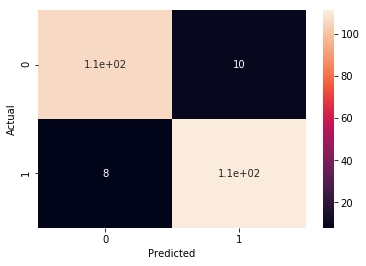

In [29]:
#Clasificador K-vecinos más cercanos (k=5)
cm2 = confusion_matrix(y_test, kv_pred)
print(cm2)
data_kv = {'y_Actual':    y_test,
        'y_Predicted': kv_pred
        }
df = pd.DataFrame(data_kv, columns=['y_Actual','y_Predicted'])
confusion_matrix_kv = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_kv, annot=True)

[[102  14]
 [  4 115]]


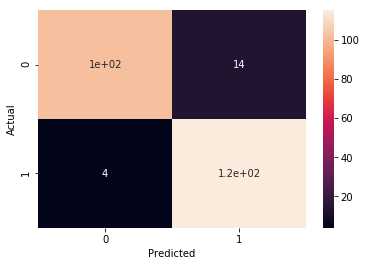

In [30]:
#Clasificador Análisis discriminante lineal
cm3 = confusion_matrix(y_test, clf_ans)
print(cm3)
data_clf = {'y_Actual':    y_test,
        'y_Predicted': clf_ans
        }
df = pd.DataFrame(data_clf, columns=['y_Actual','y_Predicted'])
confusion_matrix_clf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_clf, annot=True)

[[ 55  61]
 [ 13 106]]


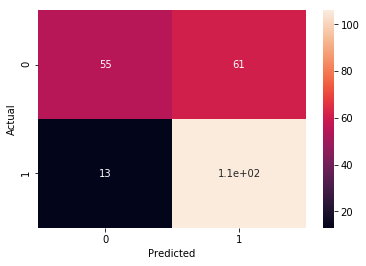

In [31]:
#Clasificador Análisis discriminante cuadrático
cm4 = confusion_matrix(y_test, pred2)
print(cm4)
data_pred2 = {'y_Actual':    y_test,
        'y_Predicted': pred2
        }
df = pd.DataFrame(data_pred2, columns=['y_Actual','y_Predicted'])
confusion_matrix_pred2 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_pred2, annot=True)

## 6 Métricas de desempeño

In [32]:
#Clasificador por regresión lineal
print("Precision: ",precision_score(y_test,ans))
print("Recall:    ",recall_score(y_test,ans))
print("F1score:   ",f1_score(y_test,ans))

Precision:  0.890625
Recall:     0.957983193277311
F1score:    0.9230769230769231


In [33]:
#Clasificador por regresión logística
print("Precision: ",precision_score(y_test,predictions_logistic))
print("Recall:    ",recall_score(y_test,predictions_logistic))
print("F1score:   ",f1_score(y_test,predictions_logistic))


Precision:  0.9333333333333333
Recall:     0.9411764705882353
F1score:    0.9372384937238494


In [34]:
#Clasificador K-vecinos más cercanos (k=5)
print("Precision: ",precision_score(y_test,kv_pred))
print("Recall:    ",recall_score(y_test,kv_pred))
print("F1score:   ",f1_score(y_test,kv_pred))

Precision:  0.9173553719008265
Recall:     0.9327731092436975
F1score:    0.925


In [35]:
#Clasificador Análisis discriminante lineal
print("Precision: ",precision_score(y_test,clf_ans))
print("Recall:    ",recall_score(y_test,clf_ans))
print("F1score:   ",f1_score(y_test,clf_ans))


Precision:  0.8914728682170543
Recall:     0.9663865546218487
F1score:    0.9274193548387097


In [36]:
#Clasificador Análisis discriminante cuadrático
print("Precision: ",precision_score(y_test,pred2))
print("Recall:    ",recall_score(y_test,pred2))
print("F1score:   ",f1_score(y_test,pred2))

Precision:  0.6347305389221557
Recall:     0.8907563025210085
F1score:    0.7412587412587412


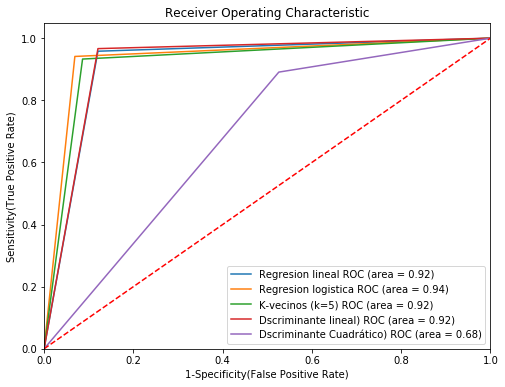

In [37]:
#Curvas ROC de todos los modelos
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
fpr_lineal, tpr_lineal, _ = roc_curve(y_test, ans)#lineal
fpr_logistica, tpr_logistica, _ = roc_curve(y_test, predictions_logistic)#logistica
fpr_kv, tpr_kv, _ = roc_curve(y_test, kv_pred)#k-vecinos
fpr_dl, tpr_dl, _ = roc_curve(y_test, clf_ans)#discriminante lineal
fpr_dq, tpr_dq, _ = roc_curve(y_test, pred2)#discriminante cuadrático

auc_lineal = roc_auc_score(y_test, ans)
auc_logistic= roc_auc_score(y_test, predictions_logistic)
auc_kv = roc_auc_score(y_test, kv_pred)
auc_dl = roc_auc_score(y_test, clf_ans)
auc_dq= roc_auc_score(y_test, pred2)


plt.figure(figsize=(8,6))
plt.plot(fpr_lineal, tpr_lineal, label='%s ROC (area = %0.2f)' % ('Regresion lineal', auc_lineal))
plt.plot(fpr_logistica, tpr_logistica, label='%s ROC (area = %0.2f)' % ('Regresion logistica', auc_logistic))
plt.plot(fpr_kv, tpr_kv, label='%s ROC (area = %0.2f)' % ('K-vecinos (k=5)', auc_kv))
plt.plot(fpr_dl, tpr_dl, label='%s ROC (area = %0.2f)' % ('Dscriminante lineal)', auc_dl))
plt.plot(fpr_dq, tpr_dq, label='%s ROC (area = %0.2f)' % ('Dscriminante Cuadrático)', auc_dq))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

## 7 Análisis de resultados 

### Modelo de clasificación lineal
* **Fortalazas**: Es un modelo sencillo de implementar gracias a la librería Sklearn, y aunque su naturaleza no está pensada para predecir variables discretas, gracias al uso de las curvas ROC se pudo hallar un umbral que permite mapear las predicciones originales en nuestras clases de interés (0 o 1).Poteriormente,si miramos en detalle la matriz de confusión, podemos inferir que este modelo realiza una muy buena predicción, pues sobre la diagonal principal se encuentra un alto porcentaje de los datos (__**92%**__), muchos más que en la diagonal secundaria, lo cual se puede intrpretar como una predicción de buena calidad, ya que está clasificando en la mayoría de los casos de manera correcta, logrando obtener el segundo F1 score más alto (__**0.92**__)
* **Dificultades**:No se encuentra una dificultad relevante con este modelo y nuestro conjunto de datos
### Modelo de clasificación por regresión logística
* **Fortalazas**: Este modelo es fácil de implementar con la librería sklearn y además es pertinente cuando lo que se quiere predecir es una variable binaria .Analizando la matriz de confusión se puede detallar que la cantidad de datos sobre la diagonal principal es de aproximadamente __**93.6%**__ de los datos, lo cual es significativamente mayor que la cantidad de datos sobre la diagonal secundaria, esto se puede interpretar como un excelente desempeño que efectivamente es corroborado con un  F1 score de __**0.93**__,por lo cual se puede concluir que la predicción que se logra hacer con este modelo es de muy buena calidad.

* **Dificultades**: No se encuentra una dificultad relevante con este modelo y nuestro conjunto de datos

### Modelo de clasificación por K-vecinos más cercanos (k=5)
* **Fortalazas**: Este modelo es fácil de implementar con la librería sklearn  y proporciona también muy buenos resultados,analizando  la matriz de confusión podemos observar que la cantidad de datos sobre la diagonal principal es de aproximadamente __**92%**__ , lo cual es un porcentaje de datos mucho mayor que la cantidad de datos sobre la diagonal secundaria, además el F1 score es alto (__**92.5%**__), lo que indica un muy buen desempeño, al igual que la alta precisión y sensibilidad, por todo esto se concluye entonces que la predicción que se logra hacer con este modelo es bastante buena, y de hecho muy similar a la que se puede obtener con el clasificador de regresión logística y regresión lineal(aunque es un poco mejor el de regresion logística en este caso)

* **Dificultades**: No se encuentra una dificultad relevante con este modelo y nuestro conjunto de datos

### Modelo de clasificación por discriminante lineal
* **Fortalazas**: Este modelo es fácil de implementar con la librería sklearn y también tuvo un buen desempeño, revisando  la matriz de confusión se puede detallar que sobre la diagonal principal está el __**92.3%**__ de los datos, lo que se puede interpretar como un excelente desempeño que efectivamente es corroborado con F1 score de **0.92**, además el modelo presenta alta precisión y sensibilidad,por lo cual se puede concluir que la predicción que se logra hacer con este modelo es de buena calidad (aunque sus resultados son muy similares al modelo de regresión logística,regresión lineal y k vecinos , el que presenta mayor rendimiento hasta el momento es el de regresion logistica)

* **Dificultades**: No se encuentra una dificultad relevante con este modelo y nuestro conjunto de datos

### Modelo de clasificación por discriminante cuadrático
* **Fortalazas**: Es un modelo fácil de implementar con la ayuda de la librería Sklearn

* **Dificultades**:Este modelo, aunque no es malo, si es bastante inferior en cuanto a calidad de predicción respecto a los otros modelos, sus scores siempre son un poco más bajos que los demás y es el de menor área bajo la curva ROC, la diagonal principal de la matriz no tiene tantos datos como los otros modelos (tiene tan solo el **68.5%** de los datos , frente al **31.5%** de  la diagonal secundaria), lo cual es un indice muy regular, pues se está prediciendo de una manera no muy deseada, por lo tanto se puede inferir que este modelo no es adecuado para el propósito que nos hemos prouesto, ya que su predicción no alcanza a compararse con alguno de los modelos presentados anteriormente
### ¿Cuál es la mejor técnica?
- Analizando varias veces las métricas de desempeño y evaluación de los modelos de aprendizaje (F1Score ,precision, recall) y además el área bajo la curva de cada uno de los modelos  en la curva ROC se puede concluir que el mejor modelo para nuestro propósito es el modelo de regresión logística, su score en todas estas métricas siempre es superior al de los demás modelos, logrando entonces predecir nuestra enfermedad de una manera mucho más confiable (pues se trata de un diagnóstico médico, tenemos que quedarnos necesariamente con el modelo que nos proporcione el mejor rendimiento y calidad de predicción)